### Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Đọc dữ liệu và xem thông tin cơ bản

In [2]:
titanic = pd.read_csv('data/titanic.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Các biến có ý nghĩa phân tích: Survived <-- Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# Các biến categorycal: Survived, Pclass, Sex, Embarked
# Các biến numeric: Age, SibSp, Parch, Fare

In [8]:
titanic.drop(columns=['PassengerId'], inplace=True)

### Xử lý dữ liệu bị trùng lặp

In [9]:
titanic.duplicated().any()

False

In [10]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [11]:
titanic_copy = titanic.copy()

In [12]:
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [13]:
cat_cols =titanic.select_dtypes(include=['object','category']).columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [14]:
num_cols = titanic.select_dtypes(include='number').columns
num_cols

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Thống kê dữ liệu

In [15]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic.describe(include=['object','category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [17]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
for col in cat_cols:    
    print(titanic[col].value_counts(), '\n')

0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



### Xử lý dữ liệu bị thiếu

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    object  
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    object  
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 43.9+ KB


In [23]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [24]:
titanic.isnull().sum()/titanic.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [25]:
titanic[titanic['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q


In [26]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [27]:
# Điền NaN trong biến Age bằng giá trị mean
m = titanic.Age.mean()
titanic.Age.fillna(m, inplace=True)

In [28]:
# Điền NaN trong biến Embarked bằng giá trị mode
m = titanic.Embarked.mode()[0]
titanic.Embarked.fillna(m, inplace=True)

#### Cách làm khác

In [ ]:
titanic_copy.isnull().sum()
# nếu tỷ lệ thiếu <= 5% thì xóa các quan sát
# nếu tỷ lệ thiếu > 5% thì thay thế bằng mean, median, mode

In [ ]:
threshold = len(titanic_copy)*0.05
print(threshold)

In [ ]:
cols_to_drop = titanic_copy.columns[(titanic_copy.isnull().sum()<=threshold) & (titanic_copy.isnull().sum()>0)]
print(cols_to_drop)

In [ ]:
titanic_copy.dropna(subset=cols_to_drop, inplace=True)

### Xử lý ngoại lệ (outlier)

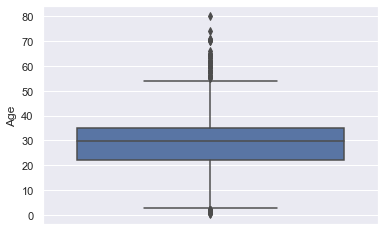

In [29]:
sns.boxplot(data=titanic, y='Age')
plt.show()

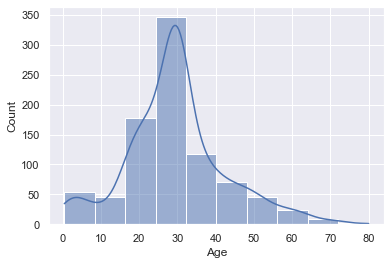

In [30]:
sns.histplot(data=titanic, x='Age', bins=10, kde=True)
plt.show()

In [31]:
titanic['Age'].skew()

0.4344880940129925

In [32]:
titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
Q1 = titanic.Age.quantile(0.25)
Q2 = titanic.Age.quantile(0.50)
Q3 = titanic.Age.quantile(0.75)
IQR = Q3 - Q1
print('Q1 25%:', round(Q1,2))
print('Q2 50%:', round(Q2,2))
print('Q3 75%:', round(Q3,2))
print('IQR:', round(IQR,2))

Q1 25%: 22.0
Q2 50%: 29.7
Q3 75%: 35.0
IQR: 13.0


In [34]:
w = 1.5
UW = Q3 + w*IQR
print('upper whisker:', UW)
LW = Q1 - w*IQR
print('lower whisker:', LW)

upper whisker: 54.5
lower whisker: 2.5


In [35]:
# xác định các upper outlier
u_outliers = titanic[titanic['Age']>UW].sort_values(by='Age')
u_outliers['Age'].head()

15     55.0
492    55.0
152    55.5
467    56.0
647    56.0
Name: Age, dtype: float64

In [36]:
# xác định các lower outlier
l_outliers = titanic[titanic['Age']<LW].sort_values(by='Age')
l_outliers['Age'].head()

803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64

In [37]:
# xóa các outlier
titanic.drop(index=u_outliers.index, inplace=True)
titanic.drop(index=l_outliers.index, inplace=True)

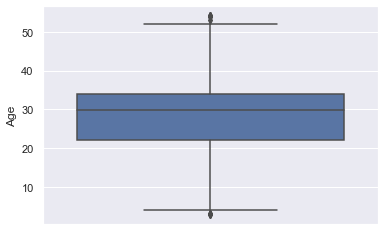

In [38]:
sns.boxplot(data=titanic, y='Age')
plt.show()

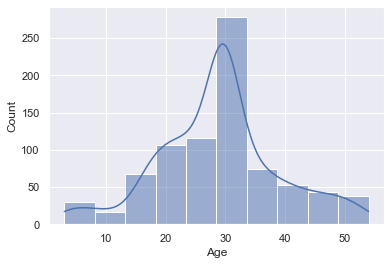

In [39]:
sns.histplot(data=titanic, x='Age', bins=10, kde=True)
plt.show()

In [40]:
titanic['Age'].skew()

0.06160898523521131